<a href="https://colab.research.google.com/github/piyu18/Naive-Bayes-Classifier/blob/main/Naive_Bayes_titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the csv file
df = pd.read_csv('titanic_dataset.csv')
df.sample(5)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
884,885,"Sutehall, Mr. Henry Jr",3,male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
677,678,"Turja, Miss. Anna Sofia",3,female,18.0,0,0,4138,9.8417,NaN,S,1
468,469,"Scanlan, Mr. James",3,male,NaN,0,0,36209,7.7250,NaN,Q,0
139,140,"Giglio, Mr. Victor",1,male,24.0,0,0,PC 17593,79.2000,B86,C,0
736,737,"Ford, Mrs. Edward (Margaret Ann Watson)",3,female,48.0,1,3,W./C. 6608,34.3750,NaN,S,0


### Exploratory Data Analysis(EDA)
Explore the dataset to gain more insights

In [3]:
# total number of rows and columns
df.shape

(891, 12)

We will drop the columns PassengerId, Name, SibSp, Parch, Ticket, Cabin and Embarked, as they are not relevant in finding the Survival of passenger

In [4]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [6]:
df['Sex'] = df['Sex'].apply(lambda x:1 if x=='male' else 0)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [7]:
# check missing values
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


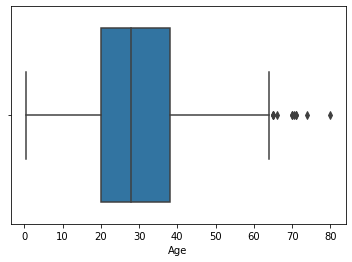

In [8]:
# check outliers
import seaborn as sns
sns.boxplot(df['Age'])

Since we have 177 missing values in Age column and few outliers are also there so we will replace the null values with meadian instead of mean.

In [9]:
df['Age'] = df.Age.fillna(df.Age.median())
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [10]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [11]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [12]:
X

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,28.0,23.4500
889,1,1,26.0,30.0000


### Split data into training and test dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [15]:
gnb.score(X_test, y_test)

0.7318435754189944

In [16]:
y_pred = gnb.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[85, 25],
       [23, 46]])